# Capstone Final Project : House hunting in Nice, France

## Introduction

Capital of the French Riviera, Nice is one of the most popular tourist destinations in the world. Its assets are unique and numerous. Nice has an ideal location right between the Mediterranean Sea and the mountains, just a few kilometers from the Italian border. It boasts a mild climate, bright sun, diverse landscapes, and of course beautiful beaches with blue azure waters. It sounds like the perfect place to live!

Of course, when you are looking for the house of your dreams, there are several subjects to be concerned for. We can start by the price of the house, of course... It should be a house or an apartment? the number of rooms, the surface, etc. But this is easily accessible information that you can have at hand through the agencies' web sites. However, having an idea about the surroundings, and about the neighborhood’s lifestyle is a little bit more complicated. 

The objective of this project is to identify suitable neighborhoods to purchase or rent a house or apartment in Nice, France. The suitability of a neighborhood will mainly depend on the reachability of diverse facilities and venues. This information must allow us to answer questions such as: How many restaurants will be near my new home, there are some schools in the neighborhood, what about subway and bus stations, it will be practical for going to work? We will obtain accurate information about venues and facilities from Frousquate.

So, the final goal is to group similar neighborhoods (according to the characteristics mentioned before), and then provide the information in a suitable way that will facilitate a wise selection of your new hose!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download Datasets</a>

2. <a href="#item2">Exploratory Analysis</a>

3. <a href="#item2">Data Preparation</a>

4. <a href="#item3">Clustering</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

## 1. Download Datasets

Before getting the data and start exploring it, I download all the required dependencies.

In [38]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import folium
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

For this project, I will use two datasets: (1) A dataset that contains a list of properties in Nice, and their geographical coordinates, and (2) the Foursquare dataset to have information about the venues in the surrounding area.

### List of properties and their geographical coordinates

First, I download the dataset about properties (houses, apartments, etc.) and values in France (Nice, and other cities).

In [3]:
#data schema in: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/
path = "https://cadastre.data.gouv.fr/data/etalab-dvf/latest/csv/2018/full.csv.gz" 
df_logement = pd.read_csv(path)

C:\Users\LourdesMartinez\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,26,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_logement = df_logement[0:100000]

In [5]:
df_logement.shape
df_logement.info()
df_logement.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
id_mutation                     100000 non-null object
date_mutation                   100000 non-null object
numero_disposition              100000 non-null int64
nature_mutation                 100000 non-null object
valeur_fonciere                 99189 non-null float64
adresse_numero                  54368 non-null float64
adresse_suffixe                 3650 non-null object
adresse_nom_voie                99305 non-null object
adresse_code_voie               99310 non-null object
code_postal                     99307 non-null float64
code_commune                    100000 non-null object
nom_commune                     100000 non-null object
code_departement                100000 non-null object
ancien_code_commune             1607 non-null float64
ancien_nom_commune              1607 non-null object
id_parcelle                     100000 non-null object
ancien_id_parcelle

id_mutation date_mutation  numero_disposition nature_mutation  \
0      2018-1    2018-01-03                   1           Vente   
1      2018-1    2018-01-03                   1           Vente   
2      2018-2    2018-01-04                   1           Vente   
3      2018-2    2018-01-04                   1           Vente   
4      2018-2    2018-01-04                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe    adresse_nom_voie  \
0         109000.0            13.0             NaN     RUE GEN LOGEROT   
1         109000.0            13.0             NaN     RUE GEN LOGEROT   
2         239300.0             4.0             NaN  RUE DE LA BARMETTE   
3         239300.0             4.0             NaN  RUE DE LA BARMETTE   
4         239300.0             4.0             NaN  RUE DE LA BARMETTE   

  adresse_code_voie  code_postal  ...   type_local surface_reelle_bati  \
0              1660       1000.0  ...   Dépendance                 NaN   
1              1660       1000.0  ...  Appartement                73.0   
2              0025       1250.0  ...       Maison               163.0   
3              0025       1250.0  ...       Maison                51.0   
4              0025       1250.0  ...       Maison                51.0   

  nombre_pieces_principales  code_nature_culture       nature_culture  \
0                       0.0                  NaN                  NaN   
1                       4.0                  NaN                  NaN   
2                       4.0                    S                 sols   
3                       2.0                   AG  terrains d'agrément   
4                       2.0                    S                 sols   

  code_nature_culture_speciale nature_culture_speciale surface_terrain  \
0                          NaN                     NaN             NaN   
1                          NaN                     NaN             NaN   
2                          NaN                     NaN           949.0   
3                         JARD       Jardin d'agrément           420.0   
4                          NaN                     NaN           949.0   

  longitude   latitude  
0  5.220440  46.200062  
1  5.220440  46.200062  
2  5.408041  46.255562  
3  5.408041  46.255562  
4  5.408041  46.255562  

[5 rows x 40 columns]

I will clean the data, delete the columns with high % of empty values, or the columns that do not provide useful information for the analysis. I will also keep the dataset with information about Nice only. 

In [6]:
df_logement = df_logement.drop(columns=['adresse_numero', 'adresse_suffixe', 'ancien_code_commune', 'ancien_id_parcelle', 
                                        'ancien_nom_commune', 'code_nature_culture_speciale', 'code_type_local', 'lot1_numero',
                                        'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
                                        'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'nature_culture', 
                                        'nature_culture_speciale', 'numero_volume', 'code_nature_culture', 'surface_terrain'])

In [7]:
df_logement_nice = df_logement[df_logement.nom_commune == 'Nice']
print(df_logement_nice.shape)

(12646, 18)


In [8]:
df_logement_nice = df_logement_nice.dropna(subset=['longitude'])
print(df_logement_nice.shape)

(12630, 18)


In [9]:
df_logement_nice = df_logement_nice.dropna(subset=['latitude'])
print(df_logement_nice.shape)

(12630, 18)


I use Padas Profiling for generating a report of the dataset. 

In [10]:
pandas_profiling.ProfileReport(df_logement_nice)

In [11]:
df_logement_nice['latitude'] = df_logement_nice['latitude'].apply(lambda x: format(x, '.5f')) 
df_logement_nice['longitude'] = df_logement_nice['longitude'].apply(lambda x: format(x, '.5f')) 

In [12]:
df_logement_nice = df_logement_nice[0:1000]

In [14]:
df_logement_nice.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
78293  2018-29550    2018-01-08                   1           Vente   
78294  2018-29551    2018-01-04                   1           Vente   
78295  2018-29552    2018-01-09                   1           Vente   
78296  2018-29552    2018-01-09                   1           Vente   
78297  2018-29553    2018-01-08                   1           Vente   

       valeur_fonciere adresse_nom_voie adresse_code_voie  code_postal  \
78293         291560.0        BD CIMIEZ              1410       6000.0   
78294         326800.0    BD STALINGRAD              6285       6300.0   
78295         110000.0      RUE BERTOLA              0795       6300.0   
78296         110000.0      RUE BERTOLA              0795       6300.0   
78297          53000.0        BD CARNOT              1145       6300.0   

      code_commune nom_commune code_departement     id_parcelle  nombre_lots  \
78293         6088        Nice                6  06088000LM0086            2   
78294         6088        Nice                6  06088000KL0015            2   
78295         6088        Nice                6  06088000IR0235            1   
78296         6088        Nice                6  06088000IR0235            1   
78297         6088        Nice                6  06088000KL0013            1   

        type_local  surface_reelle_bati  nombre_pieces_principales longitude  \
78293  Appartement                 52.0                        2.0   7.27220   
78294  Appartement                 68.0                        4.0   7.28766   
78295  Appartement                 35.0                        1.0   7.29337   
78296  Appartement                 35.0                        1.0   7.29337   
78297   Dépendance                  NaN                        0.0   7.28898   

       latitude  
78293  43.71372  
78294  43.69674  
78295  43.71366  
78296  43.71366  
78297  43.69681

Create a map of Nice, France with the Nice logements superimposed on top

In [15]:
latitude = 43.70313
longitude = 7.26608
print('The geograpical coordinate of Nice City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nice City are 43.70313, 7.26608.


In [16]:
# create map of Nice using latitude and longitude values
map_nice = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng in zip(df_logement_nice['latitude'], df_logement_nice['longitude']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nice)  
    
map_nice

### Venues and Categories

Then, I define my Foursquare credentials, and I will get the venues in the sorrouding areas (1000)

In [48]:
CLIENT_ID = 'XX' # your Foursquare ID
CLIENT_SECRET = 'XX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XX
CLIENT_SECRET:XX


In [18]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [19]:
len(results['response']['categories'])

10

In [20]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))

In [21]:
print_categories(results['response']['categories'], 0, 0)

Arts & Entertainment (4d4b7104d754a06370d81259)
College & University (4d4b7105d754a06372d81259)
Event (4d4b7105d754a06373d81259)
Food (4d4b7105d754a06374d81259)
Nightlife Spot (4d4b7105d754a06376d81259)
Outdoors & Recreation (4d4b7105d754a06377d81259)
Professional & Other Places (4d4b7105d754a06375d81259)
Residence (4e67e38e036454776db1fb3a)
Shop & Service (4d4b7105d754a06378d81259)
Travel & Transport (4d4b7105d754a06379d81259)


In [26]:
def get_venues_count(ll, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                ll,
                radius,
                categoryId)
    
    return requests.get(explore_url).json()['response']['totalResults']

In [27]:
#Create new dataframe to store venues data
df_logement_venues = df_logement_nice.copy()
for c in categories_list:
    df_logement_venues[c[0]] = 0

In [29]:
df_logement_venues.head()

id_mutation date_mutation  numero_disposition nature_mutation  \
78293  2018-29550    2018-01-08                   1           Vente   
78294  2018-29551    2018-01-04                   1           Vente   
78295  2018-29552    2018-01-09                   1           Vente   
78296  2018-29552    2018-01-09                   1           Vente   
78297  2018-29553    2018-01-08                   1           Vente   

       valeur_fonciere adresse_nom_voie adresse_code_voie  code_postal  \
78293         291560.0        BD CIMIEZ              1410       6000.0   
78294         326800.0    BD STALINGRAD              6285       6300.0   
78295         110000.0      RUE BERTOLA              0795       6300.0   
78296         110000.0      RUE BERTOLA              0795       6300.0   
78297          53000.0        BD CARNOT              1145       6300.0   

      code_commune nom_commune  ... Arts & Entertainment College & University  \
78293         6088        Nice  ...                    0                    0   
78294         6088        Nice  ...                    0                    0   
78295         6088        Nice  ...                    0                    0   
78296         6088        Nice  ...                    0                    0   
78297         6088        Nice  ...                    0                    0   

       Event Food  Nightlife Spot  Outdoors & Recreation  \
78293      0    0               0                      0   
78294      0    0               0                      0   
78295      0    0               0                      0   
78296      0    0               0                      0   
78297      0    0               0                      0   

      Professional & Other Places Residence  Shop & Service  \
78293                           0         0               0   
78294                           0         0               0   
78295                           0         0               0   
78296                           0         0               0   
78297                           0         0               0   

       Travel & Transport  
78293                   0  
78294                   0  
78295                   0  
78296                   0  
78297                   0  

[5 rows x 28 columns]

In [ ]:
#Request number of venues, store result as CSV
for i, row in df_logement_venues.iterrows():
    coordinates = str(df_logement_venues.latitude[i])+','+str(df_logement_venues.longitude[i])
    #print(coordinates)
    for c in categories_list:
        df_logement_venues.loc[i, c[0]] = get_venues_count(coordinates, radius=1000, categoryId=c[1])

In [ ]:
df_logement_venues.to_csv('logements_venues_nice.csv')

## 2. Exploratory Analysis

Plot the number of venues as boxplots

In [33]:
logement_venues = df_logement_venues[['Arts & Entertainment','College & University','Event','Food',
                                           'Nightlife Spot','Outdoors & Recreation','Professional & Other Places',
                                           'Residence', 'Shop & Service', 'Travel & Transport']]

In [34]:
logement_venues = logement_venues[0:100]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

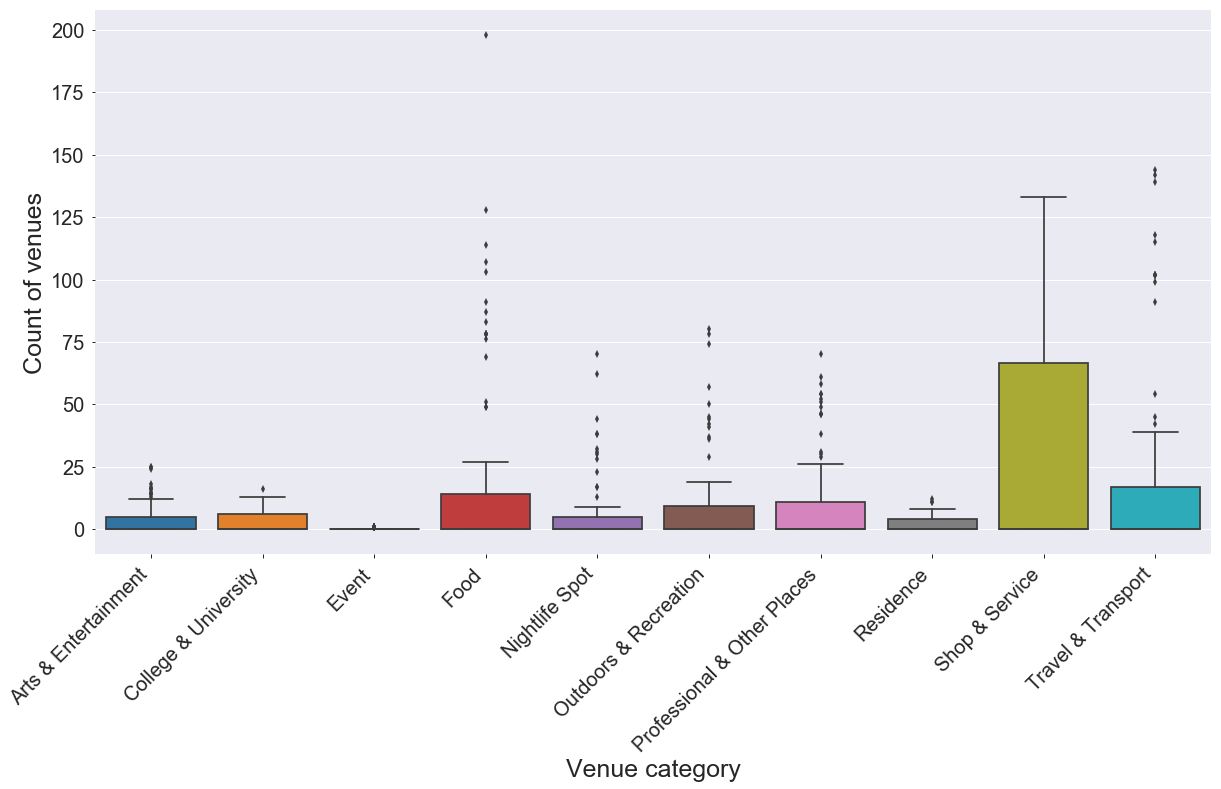

In [35]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = logement_venues)

ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

The most frequent venue categories are shop&service, Travel & Transport, follwed by Food, Professional and Outdoors Recreations are in the 4th and 5th places. Event has very little data, let's discard it from both the dataframe and the list of categories.

In [36]:
logement_venues.drop('Event', 1, inplace=True)

In [37]:
categories_list = list(filter(lambda x: x[0] != 'Event', categories_list))

## 3. Data Preparation

Let's normalize the data using MinMaxScaler (scale from 0 to 1). This scales the data and provides an easy to interpret score at the same time.

In [39]:
X = logement_venues.values[:,0:]
cluster_dataset = MinMaxScaler().fit_transform(X)

C:\Users\LourdesMartinez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
cluster_df = pd.DataFrame(cluster_dataset)
cluster_df.columns = [c[0] for c in categories_list]
cluster_df.head()

Arts & Entertainment  College & University      Food  Nightlife Spot  \
0                  0.12                1.0000  0.065657        0.128571   
1                  0.60                0.4375  0.348485        0.442857   
2                  0.08                0.4375  0.020202        0.014286   
3                  0.08                0.4375  0.020202        0.014286   
4                  0.56                0.4375  0.257576        0.242857   

   Outdoors & Recreation  Professional & Other Places  Residence  \
0                 0.1000                     0.328571   0.416667   
1                 0.5625                     0.414286   0.916667   
2                 0.0375                     0.114286   0.500000   
3                 0.0375                     0.114286   0.500000   
4                 0.5250                     0.257143   0.916667   

   Shop & Service  Travel & Transport  
0        0.330827            0.097222  
1        0.616541            0.270833  
2        0.263158            0.090278  
3        0.263158            0.090278  
4        0.571429            0.215278

Visualize the scaled data.

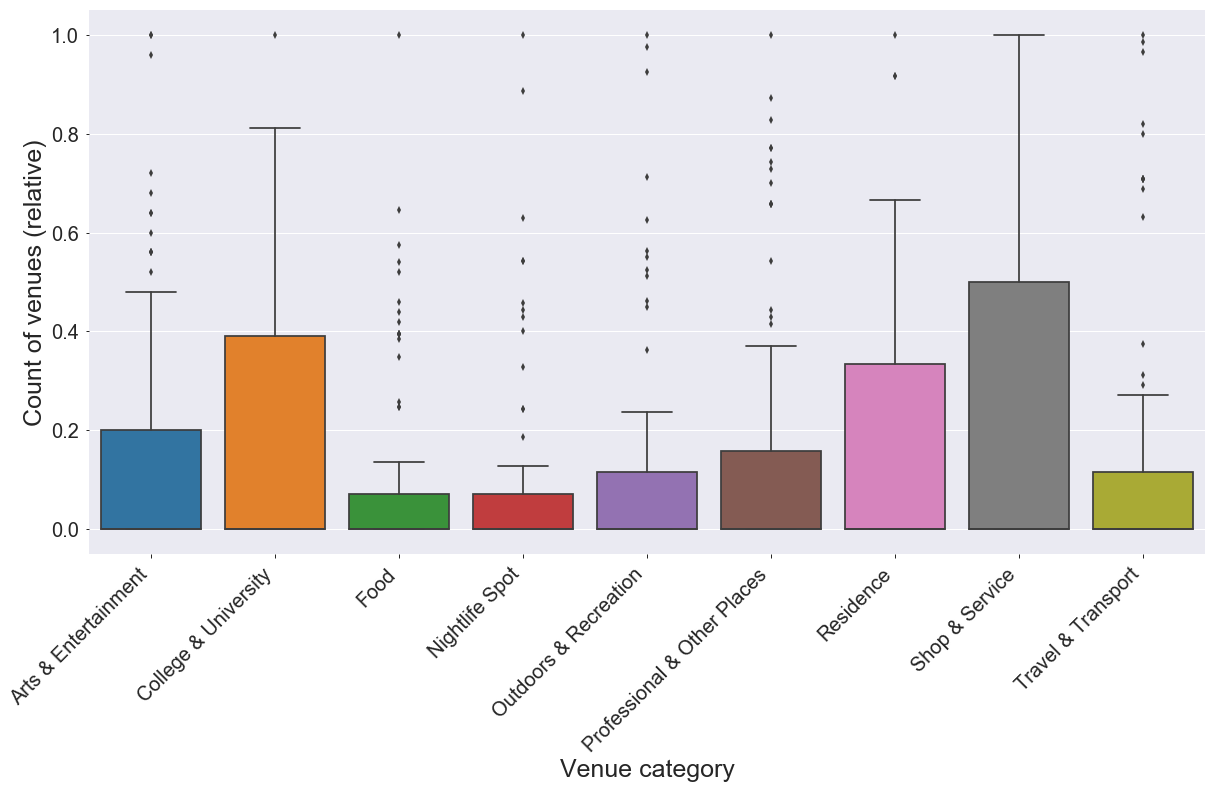

In [41]:
plt.figure(figsize=(20, 10))
#plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = cluster_df)
ax.set_ylabel('Count of venues (relative)', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

## 4. Clustering

We'll be using k-means clustering. I used the Elbow method to determine the best number of clusters. 

Text(0, 0.5, 'WCSS')

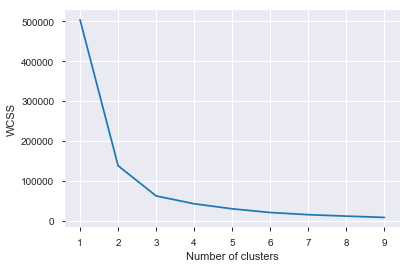

In [42]:
#Determining number of clusters with the elbow method using inertia
wcss=[]
nc = 10

for i in range(1,nc):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)        

plt.plot(range(1,nc),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

According to the Elbow method, the best number of clusters for the final analysis is 4 clusters.

In [43]:
coordinates = []
for lat,lon in zip(df_logement_venues.latitude, df_logement_venues.longitude): 
    coord = str(lat)+','+str(lon)
    coordinates.append(coord)

In [44]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_df)

kmeans_labels = kmeans.labels_
# Change label numbers so they go from highest scores to lowest
replace_labels = {0:3, 1:1, 2:2, 3:0}
for i in range(len(kmeans_labels)):
    kmeans_labels[i] = replace_labels[kmeans_labels[i]]

logement_clusters_df = logement_venues.copy()
logement_clusters_df['Cluster'] = kmeans_labels
logement_clusters_minmax_df = cluster_df.copy()
logement_clusters_minmax_df['Cluster'] = kmeans_labels
logement_clusters_minmax_df['Neighbourhood Name'] = df_logement_venues['adresse_nom_voie']
logement_clusters_minmax_df['Coordinates'] = coordinates

In [45]:
logement_clusters_minmax_df.head()

Arts & Entertainment  College & University      Food  Nightlife Spot  \
0                  0.12                1.0000  0.065657        0.128571   
1                  0.60                0.4375  0.348485        0.442857   
2                  0.08                0.4375  0.020202        0.014286   
3                  0.08                0.4375  0.020202        0.014286   
4                  0.56                0.4375  0.257576        0.242857   

   Outdoors & Recreation  Professional & Other Places  Residence  \
0                 0.1000                     0.328571   0.416667   
1                 0.5625                     0.414286   0.916667   
2                 0.0375                     0.114286   0.500000   
3                 0.0375                     0.114286   0.500000   
4                 0.5250                     0.257143   0.916667   

   Shop & Service  Travel & Transport  Cluster Neighbourhood Name  \
0        0.330827            0.097222        2          BD CIMIEZ   
1        0.616541            0.270833        1      BD STALINGRAD   
2        0.263158            0.090278        2        RUE BERTOLA   
3        0.263158            0.090278        2        RUE BERTOLA   
4        0.571429            0.215278        1          BD CARNOT   

                            Coordinates  
0                       43.71372,7.2722  
1  43.696740000000005,7.287660000000001  
2           43.71366,7.2933699999999995  
3           43.71366,7.2933699999999995  
4           43.69681,7.2889800000000005

Visualize the clusters with boxplots.

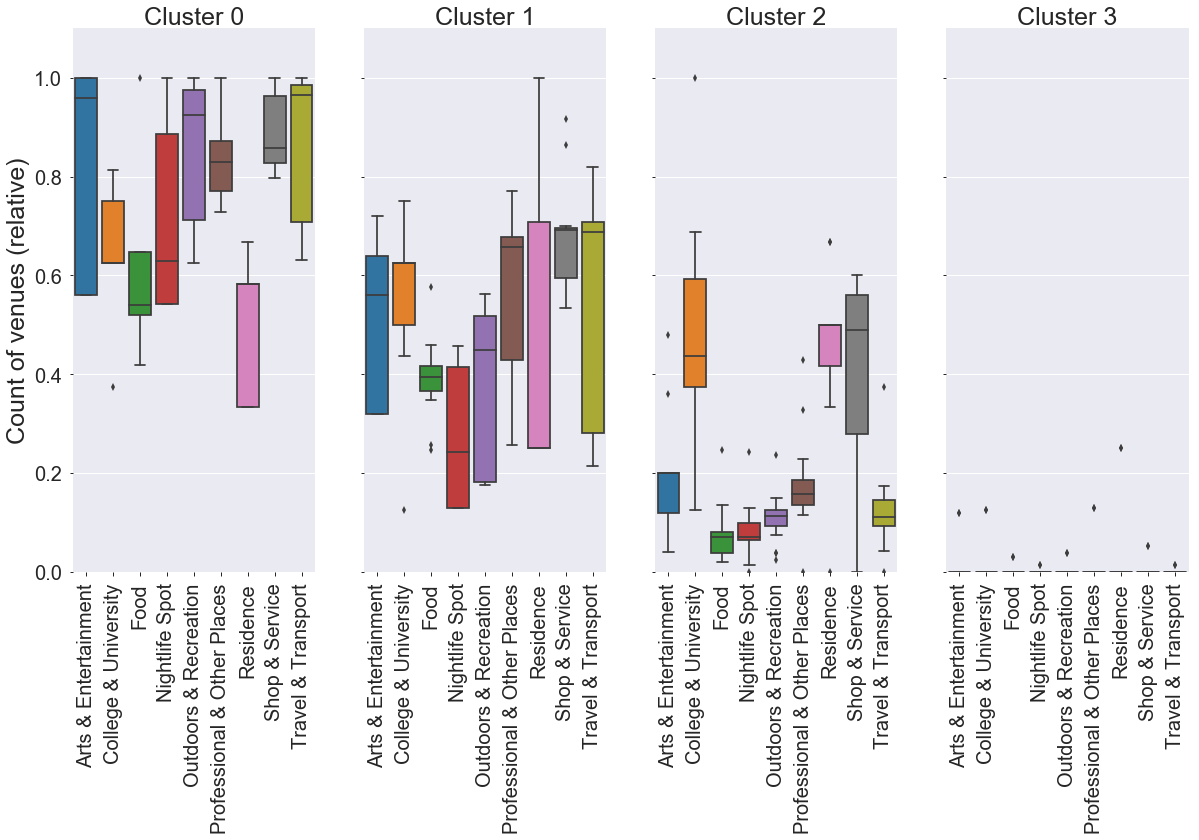

In [46]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,kclusters, figsize=(20, 10), sharey=True)
axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,1.1)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = logement_clusters_minmax_df[logement_clusters_minmax_df['Cluster'] == k].drop('Cluster',1), ax=axes[k])

plt.show()

In [47]:
#create map of Nice 
map_nice = folium.Map(location=[43.70313, 7.26608], zoom_start=13)

#add markers
for i, logement, coordinates, cluster in zip(logement_clusters_minmax_df.index,
                                         logement_clusters_minmax_df['Neighbourhood Name'],
                                         logement_clusters_minmax_df['Coordinates'],
                                         logement_clusters_minmax_df['Cluster']):
    latlong = [float(x) for x in coordinates.split(',')]    
    #colors = sns.color_palette(None, kclusters).as_hex()
    colors=['blue','green','orange','red']
    #Calculate top 3 categories for each neighbourhood
    logement_series = logement_clusters_minmax_df.iloc[i]
    top_categories_dict = {}
    for cat in categories_list:
        top_categories_dict[cat[0]] = logement_series[cat[0]]
    top_categories = sorted(top_categories_dict.items(), key = lambda x: x[1], reverse=True)
    popup='<b>{}</b><br>Cluster {}<br>1. {} {}<br>2. {} {}<br>3. {} {}'.format(
        logement,
        cluster,
        top_categories[0][0],
        "{0:.2f}".format(top_categories[0][1]),
        top_categories[1][0],
        "{0:.2f}".format(top_categories[1][1]),
        top_categories[2][0],
        "{0:.2f}".format(top_categories[2][1]))
    folium.CircleMarker(
        latlong,
        fill=True,
        fill_opacity=0.5,
        popup=folium.Popup(popup, max_width = 300),
        radius=5,
        color=colors[cluster]
    ).add_to(map_nice)
    
map_nice

## 5. Examine Clusters

Here is how we can characterize the clusters by looking at venue scores

   * Cluster 0 (Blue) has consistently high scores for Arts, Entertainment, Recreation, Shop & Service venue categories. This is the most recommended part of the city for having some recreation, entertainment and fun. 
   * Cluster 1 (Green) has very good marks for Arts & Entertanment, Shop & Services, but also for College & University. This is the business part for students.
   * Cluster 2 (Orange) has very food marks for College & University, as well as for Shop&Service. However, less entertainment than in Cluster 1. 
   * Cluster 3 (Red) has low marks across the board. These appear to be underdeveloped areas.
   
Plotting the clusters on a map shows us that

Cluster 0 is the central part of the city. Cluster 1 is in the periphery of downtown. Most of these locations have very good marks for entertainment, shop and services. Clusters 2 and 3 are the borders of the city. Cluster 4 areas tend to be at the north side.


### Conclusions

In this project, the input data set was enriched with information about access to different facilities. This can be extended further with more detailed information, for instance, the profile of the person that is looking for some property, this will allow to rank results according to personal prefferences. 

This study demonstrates how data science and machine learning can be employed for buying or renting a house, providing some insights and constats about the neighborhood and surrounding areas. After all, when purchasing a home, a lot of decisions are heavily influenced by location. 

Nowdays, there exist different open data sources, such as foursquare, European union Open Data portal, Data.gov, Google public data, among many others. This access to public data is valuable material for us, that give us the opportunity to be creative, to learn, to practice and to have fun with the activity that we love the most, Data Science of course! 

As shown, different tools, and python APIs such as, requests, pandas and folim can be used for data access, manipulation, and visualization, respectively. Moreover, libraries like sklearn facilitate the access to machin learning algorithms that allow us to identify data patters and group elements according to similar characteristics in a quick and accurate way. 
